# Logistic Regression to predict the selling price of a used car

In [0]:
#Author - Uday Ivaturi
#USF ID - U91336167

The dataset contains historical car auction sales prices, scraped from the outside internet sources (Kaggle). This dataset has been collected in 2015 and contain 558838 records.

In [0]:
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.appName('GRPPRJ-USEDCARS').getOrCreate()

Due to Limitations of the filesize to upload on the databricks community edition, we had to split it into four files. Read all four files and merge them for a dataframe

In [0]:
# File location and type
file_location = "/FileStore/tables/car_prices__1.csv"
file_type = "csv"

# CSV options
infer_schema = "true" #false
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df1 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

#display(df1)
df1.head()

Out[3]: Row(year=2015, make='Kia', model='Sorento', trim='LX', body='SUV', transmission='automatic', vin='5xyktca69fg566472', state='ca', condition=5.0, odometer=16639, color='white', interior='black', seller='kia motors america, inc', mmr=20500, sellingprice=21500, saledate='Tue Dec 16 2014 12:30:00 GMT-0800 (PST)')

In [0]:
# File location and type
file_location = "/FileStore/tables/car_prices_2.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df2 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("sep", delimiter) \
  .load(file_location)

#display(df2)
df2.head()

Out[4]: Row(_c0='2007', _c1='Toyota', _c2='Prius', _c3='Base', _c4='Hatchback', _c5='automatic', _c6='jtdkb20u273235378', _c7='nv', _c8='4.3', _c9='70211', _c10='gray', _c11='gray', _c12='michael hohl motor company', _c13='6850', _c14='10100', _c15='Fri Jan 16 2015 03:45:00 GMT-0800 (PST)')

In [0]:
# File location and type
file_location = "/FileStore/tables/car_prices_3.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df3 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("sep", delimiter) \
  .load(file_location)

#display(df3)
df3.head()

Out[5]: Row(_c0='2009', _c1='Chevrolet', _c2='Malibu', _c3='LS', _c4='Sedan', _c5='automatic', _c6='1g1zg57b39f134866', _c7='nc', _c8='2', _c9='146605', _c10='black', _c11='tan', _c12='barnett finance company', _c13='4100', _c14='3700', _c15='Tue Feb 10 2015 01:15:00 GMT-0800 (PST)')

In [0]:
# File location and type
file_location = "/FileStore/tables/car_prices_4.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df4 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("sep", delimiter) \
  .load(file_location)

#display(df4)
df4.head()

Out[6]: Row(_c0='2005', _c1='GMC', _c2='Canyon', _c3='Z85 SLE', _c4='Crew Cab', _c5='automatic', _c6='1gtds136058190201', _c7='ca', _c8='2.5', _c9='190330', _c10='white', _c11='gray', _c12='ecars', _c13='3550', _c14='5000', _c15='Tue May 19 2015 05:30:00 GMT-0700 (PDT)')

In [0]:
#Merging all four files
df=df1.union(df2).union(df3).union(df4)

##### Data pre-processing

In [0]:
#removed vin, seller & saledate as they are not relevant in determining the selling price
#created new column as sale year to calcualte the age of the vehicle.
#also converting into appropriate data types
dfreal = df.selectExpr("cast(year as int) year",
                       "cast(make as string) make",
                       "cast(model as string) model",
                       "cast(trim as string) trim",
                       "cast(body as string) body",
                       "cast(transmission as string) transmission",
                       "cast(state as string) state",
                       "cast(condition as double) condition",
                       "cast(odometer as int) odometer",
                       "cast(color as string) color",
                       "cast(interior as string) interior",
                       "cast(mmr as int) mmr",
                       "cast(sellingprice as int) sellingprice",
                       "cast(substring(saledate,12,4) as int) saleyear")

In [0]:
#Calculating the age of the vehicle (Sale Year - Vehicle Manufactured Year)
dfreal = dfreal.withColumn("vage",dfreal.saleyear-dfreal.year)

In [0]:
#drop year and saleyear, now that we have age of the vehicle
dfreal = dfreal.drop("year","saleyear")

In [0]:
dfreal.printSchema()

root
 |-- make: string (nullable = true)
 |-- model: string (nullable = true)
 |-- trim: string (nullable = true)
 |-- body: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- state: string (nullable = true)
 |-- condition: double (nullable = true)
 |-- odometer: integer (nullable = true)
 |-- color: string (nullable = true)
 |-- interior: string (nullable = true)
 |-- mmr: integer (nullable = true)
 |-- sellingprice: integer (nullable = true)
 |-- vage: integer (nullable = true)



##### Data Exploration graphs

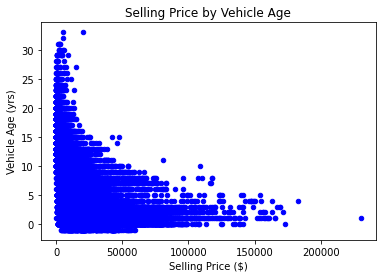

In [0]:
import matplotlib.pyplot as plt

# The charting package needs a Pandas DataFrame or NumPy array to do the conversion
dfreal_pd = dfreal.toPandas()

#Graph#1 - Selling Price by Vehicle Age
ax = dfreal_pd.plot(kind='scatter', x= 'sellingprice', y = 'vage', c='blue')
ax.set_title('Selling Price by Vehicle Age')
ax.set_xlabel('Selling Price ($)')
ax.set_ylabel('Vehicle Age (yrs)')
plt.show()


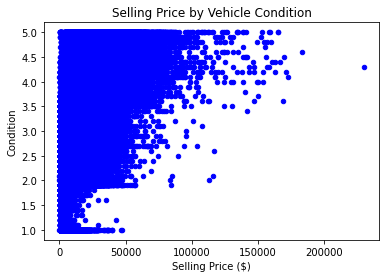

In [0]:
#Graph#2 - Selling Price by Vehicle Condition
ax = dfreal_pd.plot(kind='scatter', x= 'sellingprice', y = 'condition', c='blue')
ax.set_title('Selling Price by Vehicle Condition')
ax.set_xlabel('Selling Price ($)')
ax.set_ylabel('Condition')
plt.show()

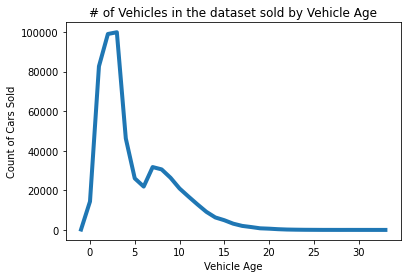

In [0]:
#Graph#3 - Vehicle Sales By Vehicle Age
dfreal_pd.vage.value_counts().sort_index().plot(lw=4)
plt.title("# of Vehicles in the dataset sold by Vehicle Age")
plt.xlabel("Vehicle Age")
plt.ylabel("Count of Cars Sold")
plt.show()

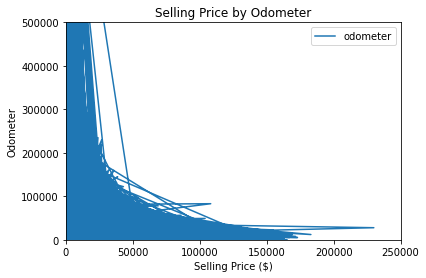

In [0]:
#Graph#4 - Vehicle Selling Price by Odometer
ax = dfreal_pd.plot(kind='line', x= 'sellingprice', y = 'odometer')
ax.set_title('Selling Price by Odometer')
ax.set_xlabel('Selling Price ($)')
ax.set_ylabel('Odometer')
plt.axis([0, 250000, 0, 500000])
plt.suptitle('')
plt.show()

In [0]:
#curious to find how many vehicles exist in the dataset between 400K and 999K miles
temp_table_name = "car_prices"

dfreal.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

/*SQL statement for the vehicles exist in the dataset between 400K and 999K miles*/

select count(*) from car_prices where odometer > 400000 and odometer <= 999999;

count(1)
123


In [0]:
#dimensions of data
dfreal.count(),len(dfreal.columns)


Out[23]: (558837, 13)

In [0]:
#Data Stats
dfreal.describe().toPandas().transpose()


,0,1,2,3,4
summary,count,mean,stddev,min,max
make,548536,None,None,Acura,vw
model,548438,798.4558724957176,804.7779516812842,1,yukon
trim,548186,351.9466127401417,826.0899047351874,!,zx3
body,545642,None,None,Navitgation,xtracab
transmission,493484,None,None,Sedan,sedan
state,558837,None,None,3vwd17aj0fm227318,wi
condition,547017,3.424512218084565,0.9494387859565863,1.0,5.0
odometer,558743,68320.01665345248,53398.54424434256,1,999999
color,558088,9048.115384615385,6426.680159005413,11034,â€”


In [0]:
#Find the null values in the columns
# import sql function pyspark
import pyspark.sql.functions as f

# null values in each column
data_agg = dfreal.agg(*[f.count(f.when(f.isnull(c), c)).alias(c) for c in dfreal.columns])
data_agg.show()

+-----+-----+-----+-----+------------+-----+---------+--------+-----+--------+---+------------+----+
| make|model| trim| body|transmission|state|condition|odometer|color|interior|mmr|sellingprice|vage|
+-----+-----+-----+-----+------------+-----+---------+--------+-----+--------+---+------------+----+
|10301|10399|10651|13195|       65353|    0|    11820|      94|  749|     749| 26|           0|  26|
+-----+-----+-----+-----+------------+-----+---------+--------+-----+--------+---+------------+----+



In [0]:
# Number of records by Make
dfreal.groupBy('make').count().show()

+-----------+-----+
|       make|count|
+-----------+-----+
| Volkswagen|12581|
| Oldsmobile|  364|
|   Infiniti|15305|
|      buick|   14|
| land rover|  129|
|      Lexus|11861|
|     Jaguar| 1420|
|     Saturn| 2841|
|       FIAT|  865|
|   Maserati|  133|
|      Scion| 1687|
|Rolls-Royce|   17|
|       Jeep|15372|
| Mitsubishi| 4140|
| mitsubishi|  117|
|    pontiac|   27|
|        Kia|18077|
|      lexus|  119|
|       null|10301|
|  Chevrolet|60197|
+-----------+-----+
only showing top 20 rows



In [0]:
#Drop empty records
dfreal=dfreal.dropna()

##### Graphs

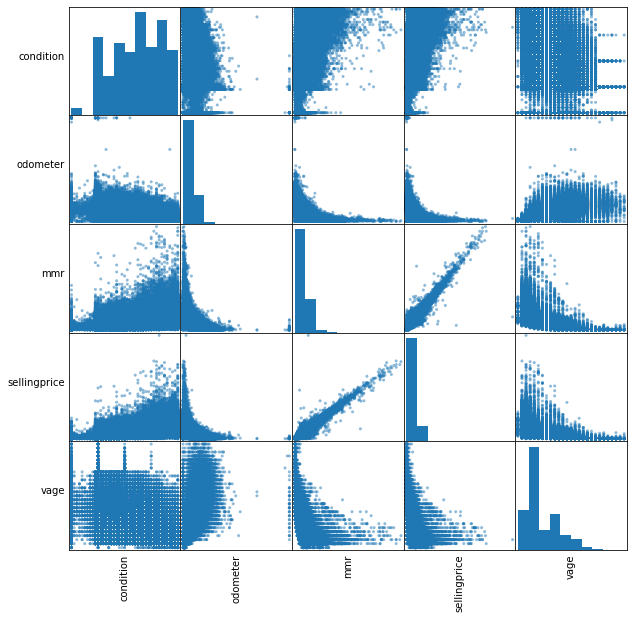

In [0]:
#Correlations between independent variables
import pandas as pd
numeric_features = [t[0] for t in dfreal.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = dfreal.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [0]:
#Determine feature correlation of numeric columns
import six
for i in dfreal.columns:
    if not( isinstance(dfreal.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to sellingprice for ", i, dfreal.stat.corr('sellingprice',i))

Correlation to sellingprice for  condition 0.5359901118534299
Correlation to sellingprice for  odometer -0.5773849819198607
Correlation to sellingprice for  mmr 0.9834919120611124
Correlation to sellingprice for  sellingprice 1.0
Correlation to sellingprice for  vage -0.5772324944918457


### Building the Linear Regression model

In [0]:
# Import the required libraries

from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler,StringIndexer,StandardScaler,OneHotEncoder
from pyspark.ml import Pipeline

In [0]:
#Identify Categorical anad Continous columns
#Filling missing values as per column data type. \ Categorical columns -> Mode \ Continous columns -> Mean/Median \ Discreate columns -> Mode
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']
continous_columns = ['vage', 'condition', 'odometer', 'mmr','sellingprice']


In [0]:
categorical_columns

Out[32]: ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']

In [0]:
continous_columns

Out[33]: ['vage', 'condition', 'odometer', 'mmr', 'sellingprice']

In [0]:
# Create a 70-30 train test split

train_data,test_data=dfreal.randomSplit([0.7,0.3])

In [0]:
#Preparing Data for Machine Learning - Category Indexing, One-Hot Encoding and VectorAssembler — a feature transformer that merges multiple columns into a vector column
stages = []
for categoricalCol in categorical_columns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index',handleInvalid='keep')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

continous_columns = ['vage', 'condition', 'odometer', 'mmr'] #Notice dropping Selling price our predictor

assemblerInputs = [c + "classVec" for c in categorical_columns] + continous_columns
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [0]:
stages

Out[36]: [StringIndexer_5d9c4f2adf4f,
 OneHotEncoder_4cb9b0d9eb2c,
 StringIndexer_310d5dd6f324,
 OneHotEncoder_42e5787acc37,
 StringIndexer_3ac336b9f200,
 OneHotEncoder_955211f6b3be,
 StringIndexer_4f63590830d2,
 OneHotEncoder_08742ec260e2,
 StringIndexer_ed112dc75622,
 OneHotEncoder_231c97a3e12d,
 StringIndexer_d21b98e32bcd,
 OneHotEncoder_9f57f028f774,
 StringIndexer_2bd5dcf13d0d,
 OneHotEncoder_7cc42935d562,
 StringIndexer_2d669a333db5,
 OneHotEncoder_c8701f1dfd3f,
 VectorAssembler_c73a9ebff51e]

In [0]:
# Create an object for the Linear Regression model
# The next step is to define the model training stage of the pipeline. 
# The following command defines a LinearRegression model that takes an input column "features" by default and learns to predict the labels in the "sellingprice" column.

lr_model = LinearRegression(labelCol='sellingprice')

In [0]:
# Pipeline is used to pass the data through indexer and assembler simultaneously. Also, it helps to pre-rocess the test data
# in the same way as that of the train data.

stages += [lr_model]
pipe = Pipeline(stages=stages)

In [0]:
# The total duration to train the model was around 3 minutes

fit_model=pipe.fit(train_data)

In [0]:
#Identify training data RMSE, R2(square) and intercept
trainSummary = fit_model.stages[-1].summary
print("RMSE: %f" % trainSummary.rootMeanSquaredError)
print("\nr2: %f" % trainSummary.r2)

#print("Coefficients: " + str(fit_model.stages[-1].coefficients))
print("\nIntercept: " + str(fit_model.stages[-1].intercept))



RMSE: 1538.254612

r2: 0.974339

Intercept: -3301.9476652608587


In [0]:
# Store the results in a dataframe

results = fit_model.transform(test_data)
results.head()

Out[51]: Row(make='Acura', model='ILX', trim='Base', body='Sedan', transmission='automatic', state='ca', condition=4.1, odometer=12905, color='silver', interior='gray', mmr=19950, sellingprice=20400, vage=0, makeIndex=20.0, makeclassVec=SparseVector(52, {20: 1.0}), modelIndex=382.0, modelclassVec=SparseVector(751, {382: 1.0}), trimIndex=0.0, trimclassVec=SparseVector(1471, {0: 1.0}), bodyIndex=0.0, bodyclassVec=SparseVector(81, {0: 1.0}), transmissionIndex=0.0, transmissionclassVec=SparseVector(2, {0: 1.0}), stateIndex=1.0, stateclassVec=SparseVector(34, {1: 1.0}), colorIndex=2.0, colorclassVec=SparseVector(20, {2: 1.0}), interiorIndex=1.0, interiorclassVec=SparseVector(17, {1: 1.0}), features=SparseVector(2432, {20: 1.0, 434: 1.0, 803: 1.0, 2274: 1.0, 2355: 1.0, 2358: 1.0, 2393: 1.0, 2412: 1.0, 2429: 4.1, 2430: 12905.0, 2431: 19950.0}), prediction=20121.703543356576)

In [0]:
#Tabluar display of Predicted Selliing Price, Actual Selling price, Accuracy and features (Top 20 rows).
from  pyspark.sql.functions import abs
#predictions = linear_model.transform(test)
x =((results['sellingprice']-results['prediction'])/results['sellingprice'])*100
results = results.withColumn('Accuracy',100-abs(x))
results.select("prediction","sellingprice","Accuracy","features").show()

+------------------+------------+-----------------+--------------------+
|        prediction|sellingprice|         Accuracy|            features|
+------------------+------------+-----------------+--------------------+
|20121.703543356576|       20400|98.63580168312048|(2432,[20,434,803...|
|17700.387715903926|       19300| 91.7118534502794|(2432,[20,434,139...|
|21297.882672483676|       21250|99.77466977654741|(2432,[20,434,927...|
| 40221.55737397916|       41500|96.91941535898593|(2432,[20,143,168...|
| 23634.24028963701|       25250|93.60095164212677|(2432,[20,143,803...|
| 26192.70142783514|       27000|97.01000528827831|(2432,[20,143,803...|
|12469.658746656658|       11000|86.63946593948492|(2432,[20,143,803...|
| 4372.759065826411|        4500|97.17242368503135|(2432,[20,143,803...|
| 19870.37241956861|       21200|93.72817179041797|(2432,[20,143,803...|
| 41719.03621360041|       43250|96.46019933780443|(2432,[20,143,121...|
| 29983.29870036206|       30750|97.50666244020182|

In [0]:
#Tabluar display of Predicted Selliing Price, Actual Selling price
results.select(['sellingprice','prediction']).show()

+------------+------------------+
|sellingprice|        prediction|
+------------+------------------+
|       20400|20121.703543356576|
|       19300|17700.387715903926|
|       21250|21297.882672483676|
|       41500| 40221.55737397916|
|       25250| 23634.24028963701|
|       27000| 26192.70142783514|
|       11000|12469.658746656658|
|        4500| 4372.759065826411|
|       21200| 19870.37241956861|
|       43250| 41719.03621360041|
|       30750| 29983.29870036206|
|       12100|11488.145509954002|
|       12250|12273.932513611811|
|        3800| 4836.338506637745|
|        3400|3434.8424685878877|
|       14600|13530.456604929774|
|        9700| 9416.353809702852|
|       14400|15188.511170744305|
|        4500|5957.6439873781055|
|       17300|18579.296648400585|
+------------+------------------+
only showing top 20 rows



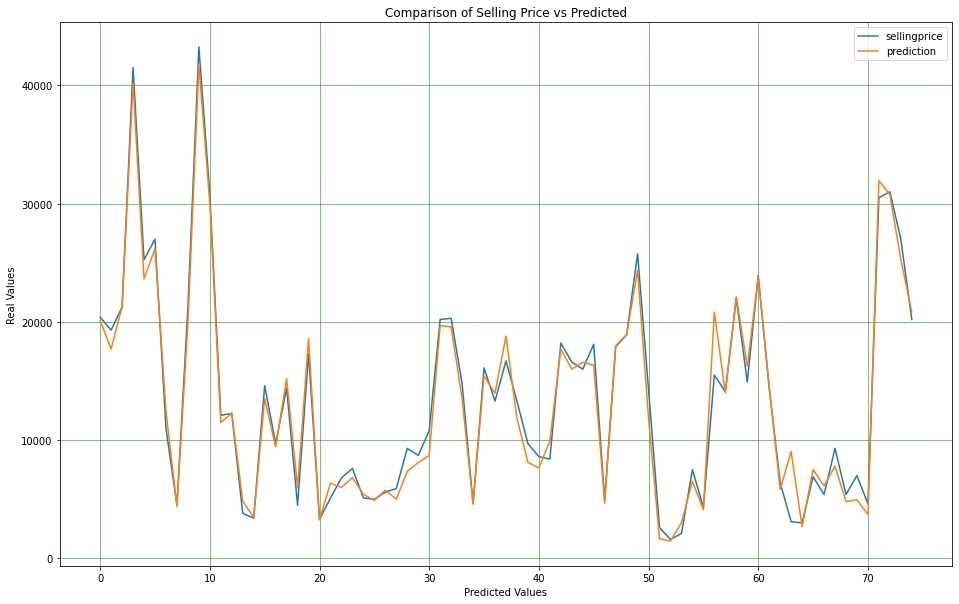

In [0]:
#Graph#5 -Comparison of Actual vs Predicted prices

predictionAndLabel = results.select(['sellingprice','prediction']).toPandas()
predictionAndLabel = predictionAndLabel.head(75) # only 75 values for graphical comparison
predictionAndLabel.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Predicted Values')  
plt.ylabel('Real Values') 
plt.title('Comparison of Selling Price vs Predicted')
plt.show()

### Evaluating the model

In [0]:
#And evaluate how well is our model doing. Our metrics will be RMSE, MSE, MAE and R^2.

from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="sellingprice", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(results)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(results, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(results, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(results, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

RMSE: 1538.431
MSE: 2366770.647
MAE: 961.162
r2: 0.975


CONCLUSION: The relationship between sellingprice and features accounts for 97.5% of the variation. Said yet another way, selected features are a good predictor of selligprice because when the features go up so does the sellingprice and vice versa.